## Data Processes: Second Assignment (second part)

### Group:
Víctor Morcuende Castell, 47315589N

Guillermo Nájera Lavid, 70845359T

Javier Rocamora García, 20081979N

Antonio Ruiz García, 06601574E

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

Open Dataset in Pandas Dataframe

In [2]:
df = pd.read_csv("heart_disease.csv")
target = df.pop('HeartDiseaseorAttack')

Decision Tree Classifier using SMOTE

In [3]:
X = df.values
y = target.values

# We create a SMOTE object
smote = SMOTE()

# Using the SMOTE object to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# We split the resampled dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Converting the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [4]:
# We create the model
model = DecisionTreeClassifier()

In [5]:
# We fit the model to the training data and evaluate it on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

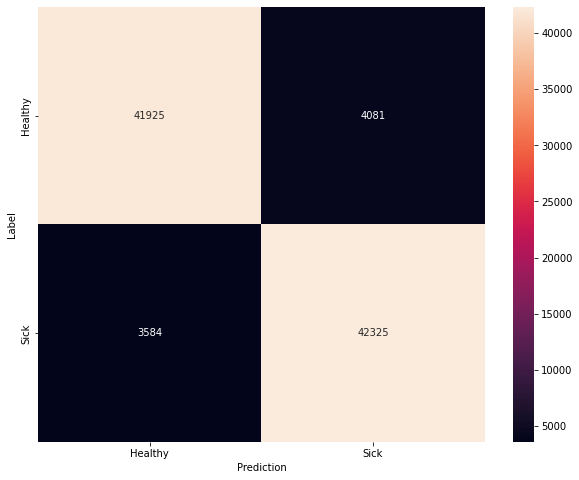

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     46006
         1.0       0.91      0.92      0.92     45909

    accuracy                           0.92     91915
   macro avg       0.92      0.92      0.92     91915
weighted avg       0.92      0.92      0.92     91915



In [6]:
# Showing the results of the Decision Tree Classifier with SMOTE through a confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
print(classification_report(y_test, y_pred))

Result: Great Accuracy and Low Bias

In [7]:
# We calculate the evaluation metrics and store them in a dictionary
eval_metrics = classification_report(y_test, y_pred, output_dict=True)

# We use the actual number of sick and healthy people given in the dataset
healthy = 229787
sick = 23893

# We calculate the recall (True Positive), 1-recall (False Negative), specificity (True Negative) and 1-specificity (False Positive) values
recall = eval_metrics['1.0']['recall']
print("Recall: %.2f" % recall)
nonRecall = 1 - recall
print("1 - Recall: %.2f" % nonRecall)
print()

specificity = eval_metrics['0.0']['recall']
print("Specificity: %.2f" % specificity)
nonSpecificity = 1 - specificity
print("1 - Specificity: %.2f" % nonSpecificity)
print()

# Fixed values
accept = 0.85
notAccept = 1 - accept
plan = 1000
treatment = 50000
success = 0.75
notSuccess = 1 - success

# We calculate the hypothetical cost of the national healthcare system
actualCost = sick * treatment
print("Actual cost of the national healthcare system: %.2f" % actualCost)
desiredCost = actualCost * 0.8
print("Desired cost: %.2f" % desiredCost)
reducedCost = actualCost - desiredCost
print("Cost amount that needs to be reduced: %.2f" % reducedCost)
print()

# We calculate the cost of the TP
costTP_notAccept = sick * recall * notAccept * treatment
print("Cost of TP that did not accept the plan: %.2f" % costTP_notAccept)
print()

# We calculate the cost of the FN
costFN = sick * nonRecall * treatment
print("Cost of FN: %.2f" % costFN)
print()

# We calculate the cost of the FP
costFP_accept = healthy * nonSpecificity * accept * plan
print("Cost of FP that accepted the plan: %.2f" % costFP_accept)
print()

predCost = actualCost
adhere = 0

while (desiredCost - predCost < 0):
  notAdhere = 1 - adhere
  costTP_accept_adhere_success = sick * recall * accept * adhere * success * plan
  costTP_accept_adhere_notSuccess = sick * recall * accept * adhere * notSuccess * (plan + treatment)
  costTP_accept_notAdhere = sick * recall * accept * notAdhere * (plan + treatment)
  predCost = costTP_accept_adhere_success + costTP_accept_adhere_notSuccess + costTP_accept_notAdhere + costTP_notAccept + costFN + costFP_accept
  adhere = adhere + 0.000000001

print("Adherence percentage needed to reduce the cost by 20 percent: %.5f" % (adhere*100))
print()

print("Cost of TP that accepted the plan, adhered to it and succeeded: %.2f" % costTP_accept_adhere_success)
print()

print("Cost of TP that accepted the plan, adhered to it and did not succeed: %.2f" % costTP_accept_adhere_notSuccess)
print()

print("Cost of TP that accepted the plan and did not adhere to it: %.2f" % costTP_accept_notAdhere)
print()
 
print("Predicted cost: %.2f" % predCost)
print()

balance = desiredCost - predCost 
print("Balance: %.2f" % balance)

Recall: 0.92
1 - Recall: 0.08

Specificity: 0.91
1 - Specificity: 0.09

Actual cost of the national healthcare system: 1194650000.00
Desired cost: 955720000.00
Cost amount that needs to be reduced: 238930000.00

Cost of TP that did not accept the plan: 165208002.52

Cost of FN: 93263316.56

Cost of FP that accepted the plan: 17325927.81

Adherence percentage needed to reduce the cost by 20 percent: 39.16339

Cost of TP that accepted the plan, adhered to it and succeeded: 5499590.04

Cost of TP that accepted the plan, adhered to it and did not succeed: 93493030.61

Cost of TP that accepted the plan and did not adhere to it: 580930132.09

Predicted cost: 955719999.63

Balance: 0.37
